In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#The data relevant to our research question is in the following two files. Note these contain background information about patients (age, sex, etc), as well as information obtained at the paitent's arrival at the ED. 
# Although there is other data available, it is obtained later in the patient's ED stay.
edstays = pd.read_csv('ed_data/edstays.csv.gz', compression='gzip')
triage = pd.read_csv('ed_data/triage.csv.gz', compression='gzip')

In [4]:
# Merge these two dataframes along the stay_id column.
df=pd.merge(edstays, triage, how='outer', on='stay_id')





In [5]:
# First check that these columns are in fact duplicates.

differences = (df['subject_id_x'] != df['subject_id_y']).sum()
print(differences)

#Now eliminate the duplicate and simplify variable name:
df.drop('subject_id_y', axis=1, inplace=True)
df.rename(columns={'subject_id_x': 'subject_id'}, inplace=False)



0


,subject_id,hadm_id,stay_id,intime,outtime,gender,race,arrival_transport,disposition,temperature,heartrate,resprate,o2sat,sbp,dbp,pain,acuity,chiefcomplaint
0,11714491,21562392.0,30000012,2126-02-14 20:22:00,2126-02-15 01:59:00,F,WHITE,AMBULANCE,ADMITTED,98.8,96.0,18.0,93.0,160.0,54.0,0,2.0,CHANGE IN MENTAL STATUS
1,14230614,NaN,30000017,2185-06-18 11:51:00,2185-06-18 15:53:00,M,BLACK/AFRICAN AMERICAN,WALK IN,ELOPED,NaN,73.0,18.0,97.0,156.0,112.0,0,3.0,"ETOH, Unable to ambulate"
2,13821532,26255538.0,30000038,2152-12-07 16:37:00,2152-12-07 19:55:00,F,WHITE,AMBULANCE,ADMITTED,97.1,54.0,18.0,95.0,143.0,73.0,0,3.0,Cough
3,13340997,23100190.0,30000039,2165-10-06 11:47:00,2165-10-06 20:18:00,M,WHITE,WALK IN,ADMITTED,98.6,85.0,16.0,98.0,189.0,96.0,0,3.0,s/p Fall
4,19848164,NaN,30000055,2155-07-18 17:03:00,2155-07-18 21:12:00,F,OTHER,WALK IN,HOME,99.4,85.0,16.0,100.0,NaN,NaN,0,3.0,L Ear pain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425082,17255106,23020029.0,39999939,2155-08-04 11:15:00,2155-08-05 12:48:00,M,HISPANIC/LATINO - DOMINICAN,AMBULANCE,HOME,98.4,84.0,16.0,97.0,152.0,90.0,2,2.0,Chest pain
425083,15768202,NaN,39999953,2152-06-22 14:08:00,2152-06-22 18:13:00,F,OTHER,WALK IN,HOME,98.2,108.0,18.0,100.0,155.0,94.0,5,3.0,"Palpitations, Dizziness, Headache"
425084,11302781,26433329.0,39999961,2145-05-16 17:16:00,2145-05-17 01:28:00,F,BLACK/AFRICAN AMERICAN,WALK IN,ADMITTED,99.3,119.0,22.0,NaN,132.0,74.0,7,2.0,"Chest pain, Cough, Dyspnea"
425085,16479007,29821286.0,39999964,2130-06-05 11:53:00,2130-06-06 18:27:00,M,WHITE,WALK IN,HOME,98.6,64.0,18.0,99.0,127.0,64.0,4,2.0,"SI, Depression"


In [6]:
#Here I have added extra variables, day of the week and time of day, for the intime. 
df['day_of_week_intime'] = pd.to_datetime(df['intime']).dt.dayofweek
df['time_of_day_intime'] = pd.to_datetime(df['intime']).dt.time

In [7]:
#hadm_id is a code for admission to the hospital from the ED. This information is not relevant to our work, so I am dropping it.

df.drop('hadm_id', axis=1, inplace=True)


In [8]:
#Here I compute the target variable, stay length, in terms of hours.
df['stay_length']=pd.to_datetime(df['outtime'])-pd.to_datetime(df['intime'])
df['stay_length_hours']= df['stay_length'].dt.total_seconds() / 3600

Preprocessing work starts here.

In [9]:
#First, let's take a look at the target variable, stay_length_hours.

df['stay_length_hours'].describe()

count    425087.000000
mean          7.158327
std           6.628000
min         -22.733333
25%           3.533333
50%           5.466667
75%           8.316667
max         493.069444
Name: stay_length_hours, dtype: float64

In [10]:
#There are some values for stay_length_hours, which are negative. This is nonsensical. Let's check how many of these there are.

print((df['stay_length_hours'] < 0).sum())

#We drop these cases.

df = df[df['stay_length_hours'] >= 0]

6


In [11]:
#Now we check how many missing values there are for each variable. 
df.isna().sum()

subject_id_x              0
stay_id                   0
intime                    0
outtime                   0
gender                    0
race                      0
arrival_transport         0
disposition               0
temperature           23415
heartrate             17090
resprate              20353
o2sat                 20596
sbp                   18291
dbp                   19091
pain                  12933
acuity                 6987
chiefcomplaint           23
day_of_week_intime        0
time_of_day_intime        0
stay_length               0
stay_length_hours         0
dtype: int64

In [12]:
#Investigate this more by checking how these missing values are distributed. The following compute the number of missing values 
# in each row and then looks at the distribution of this count. It appears that for all but 6 cases, we have at least partial information
# for the triage variables. This makes it reasonble to do some kind of imputation here.
df.isna().sum(axis=1).value_counts()

0    389270
1     15454
6      7241
8      6706
2      2633
7      1983
3       713
5       591
4       484
9         6
Name: count, dtype: int64

In [13]:
#Now let's look at each variable more closely.

df.describe()

,subject_id_x,stay_id,temperature,heartrate,resprate,o2sat,sbp,dbp,acuity,day_of_week_intime,stay_length,stay_length_hours
count,4.250810e+05,4.250810e+05,401666.000000,407991.000000,404728.000000,404485.000000,406790.000000,405990.000000,418094.000000,425081.000000,425081,425081.000000
mean,1.500874e+07,3.499737e+07,98.015048,85.079933,17.565546,98.471875,135.395456,81.262125,2.625089,2.999720,0 days 07:09:31.073411890,7.158632
std,2.878475e+06,2.888330e+06,4.008605,18.041783,5.485733,17.040933,240.958178,1057.227843,0.708079,2.002362,0 days 06:37:38.875249779,6.627465
min,1.000003e+07,3.000001e+07,0.100000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0 days 00:00:00,0.000000
25%,1.251796e+07,3.249800e+07,97.500000,72.000000,16.000000,97.000000,120.000000,68.000000,2.000000,1.000000,0 days 03:32:00,3.533333
50%,1.501634e+07,3.499401e+07,98.000000,84.000000,18.000000,99.000000,133.000000,77.000000,3.000000,3.000000,0 days 05:28:00,5.466667
75%,1.749902e+07,3.750390e+07,98.600000,96.000000,18.000000,100.000000,148.000000,87.000000,3.000000,5.000000,0 days 08:19:00,8.316667
max,1.999999e+07,3.999996e+07,986.000000,1228.000000,1820.000000,9322.000000,151103.000000,661672.000000,5.000000,6.000000,20 days 13:04:10,493.069444


In [186]:
#Note that the various input variables have values that are physically impossible. We'll need to address each of these
# Let's start with temperature. Here, the max value recorded is 986.000, and the minimum is 0.1. Both of these are physically impossible. 

#First let's look for values where the decimal point may have been moved to the left one place in error.  I started with the assumption that values should be between 82.4 F (lower cut-off for moderate hypothermia 
# according to https://my.clevelandclinic.org/health/diseases/21164-hypothermia-low-body-temperature) and 110 F. Note that there are 44 of these, and some of them would certainly be normal temperatures with a move in decimal place. 
# I replace these values with their value multiplied by 10.

filtered_values = df[(df['temperature'] >= 8.24) & (df['temperature'] <= 10.10)]['temperature']

print(len(filtered_values))

print(filtered_values)

df.loc[(df['temperature'] >= 8.24) & (df['temperature'] <= 10.10), 'temperature'] *= 10

44
30497      8.80
37682      9.00
48915      9.40
57420      9.10
63041      9.80
63134      9.00
68023      9.00
72974      9.70
80024      9.20
90363      8.40
99394      9.50
104910     9.00
110887     9.80
112636     9.00
113407     9.00
115550     9.60
119192     9.00
124773     9.60
138646     9.80
157582     9.00
168211     9.40
180822    10.00
181794     9.00
190344     9.10
192237     9.10
192917     9.10
193734     9.60
195015     8.40
199376     9.00
207364     9.10
208990     9.00
216460     9.00
219589     9.50
268045     8.60
276287     9.60
282379     9.50
313908     9.70
322975     9.83
331676     9.00
348233     9.00
368614     9.00
388628     8.60
389857     9.90
416869     9.80
Name: temperature, dtype: float64


In [14]:
#Next let's consider values where the decimal point may have been moved one place to the right in error. 

filtered_values = df[(df['temperature'] >= 824) & (df['temperature'] <= 1010)]['temperature']

print(len(filtered_values))

print(filtered_values)

df.loc[(df['temperature'] >= 824) & (df['temperature'] <= 1010), 'temperature'] *= .10

5
31824     981.0
126529    978.0
161723    977.0
364451    979.0
366200    986.0
Name: temperature, dtype: float64


In [15]:
# Next we look for values that may be in Celsius, using the same cut-off as above: 28 C= 82.4 F and 43.3 C=110 F. Note that the documentation for the data indicates that some of the temperature data may be in Celsius.

filtered_values = df[(df['temperature'] >= 28) & (df['temperature'] <= 43.3)]['temperature']

print(len(filtered_values))

print(filtered_values)

df.loc[(df['temperature'] >= 28) & (df['temperature'] <= 43.3), 'temperature'] = df['temperature'] * 9/5 + 32


391
976       36.1
4074      36.9
5274      37.6
5407      36.9
5533      36.1
          ... 
420423    36.4
422050    36.7
422906    36.3
422979    36.5
423337    36.0
Name: temperature, Length: 391, dtype: float64


In [16]:
# The above work addresses all of the issues that I can think of. So now for any values that are below 82.4 or above 110, I assume they are a mistake that I can't fix and replace them with NaN.

filtered_values = df[(df['temperature'] > 110) | (df['temperature'] < 82.4)]['temperature']

print(len(filtered_values))

print(filtered_values)

df.loc[(df['temperature'] > 110) | (df['temperature'] < 82.4), 'temperature'] = np.nan


131
3569       62.00
5938      111.40
7149       75.90
9674        7.80
14522       7.60
           ...  
405941      1.04
414134     80.00
416869      9.80
419804      7.20
420497      6.00
Name: temperature, Length: 131, dtype: float64


In [17]:
#Now let's consider heart rate. There are some very high values, but from my internet search, it seems these could be real values of someone experiencing a medical emergency. 
# So I am not going to do anything about them. There are no negative values reported for heart rate.

df['resprate'].describe()

count    404728.000000
mean         17.565546
std           5.485733
min           0.000000
25%          16.000000
50%          18.000000
75%          18.000000
max        1820.000000
Name: resprate, dtype: float64

In [18]:
#resprate: There are some very large values which appear to be physically impossible. (My cut-off of 300 here is a guess by me about what is reasonable. I could not find information about what values 
# might be possible for human beings.) There is no obvious error here (like a misplaced decimal), so I am replacing these with NaN's.

filtered_values = df[(df['resprate'] > 300)]['resprate']

print(len(filtered_values))

print(filtered_values)

df.loc[(df['resprate'] > 300), 'resprate'] = np.nan

3
53010     1796.5
359661    1820.0
401104    1797.9
Name: resprate, dtype: float64


In [166]:
#O2sat seems to be within the range of possible values, so nothing needs to be done there.

#sbp: systolic blood pressure. The internet indicated that a sbp of 1000 could be possible, but unlikely and fatal. Looking at the data, there are a few values that are large than 1000 by at least a factor of 10. 
# I am guessing these are errors and replacing with NaN.

filtered_values = df[(df['sbp'] > 1000)]['sbp']

print(len(filtered_values))

print(filtered_values)

df.loc[(df['sbp'] > 1000), 'sbp'] = np.nan

4
113412     19734.0
126529     12080.0
266542    151103.0
365075      9656.0
Name: sbp, dtype: float64


In [19]:
#dbp: diastolic blood pressure. I'll use the same criterion as above, eliminating values above 1000, although this is likely too high a cut-off. Note that there are many more dbp that fall above this cut-off.

filtered_values = df[(df['dbp'] > 1000)]['dbp']

print(len(filtered_values))

print(filtered_values)

df.loc[(df['dbp'] > 1000), 'sbp'] = np.nan

101
1571      6698.0
3037      3108.0
3195      8102.0
3642      3101.0
3888      6113.0
           ...  
408900    7288.0
413318    7297.8
420108    9102.0
420779    9556.0
422808    1102.0
Name: dbp, Length: 101, dtype: float64


Exploratory Data Analysis begins here.

,count,mean,std,min,25%,50%,75%,max
day_of_week_intime,,,,,,,,
0,61146.0,7.133109,6.557672,0.0,3.516667,5.433333,8.283333,188.100000
1,60490.0,7.173342,6.513054,0.0,3.533333,5.483333,8.333333,161.283333
2,60390.0,7.135633,6.433669,0.0,3.533333,5.466667,8.300000,182.605556
3,60883.0,7.154417,6.737229,0.0,3.516667,5.450000,8.295139,341.039722
4,60631.0,7.185426,6.560307,0.0,3.533333,5.466667,8.383333,192.566667
5,60565.0,7.168815,6.692171,0.0,3.513889,5.450000,8.300000,178.666667
6,60976.0,7.159860,6.885230,0.0,3.533333,5.466667,8.333333,493.069444


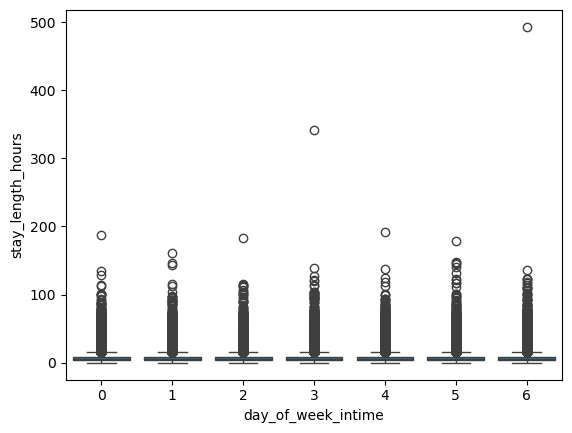

In [20]:
sns.boxplot(x='day_of_week_intime',y='stay_length_hours', data=df)
df.groupby('day_of_week_intime')['stay_length_hours'].describe()


,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
F,229894.0,7.156554,6.407647,0.0,3.607500,5.516667,8.30,341.039722
M,195187.0,7.161079,6.877381,0.0,3.433333,5.383333,8.35,493.069444


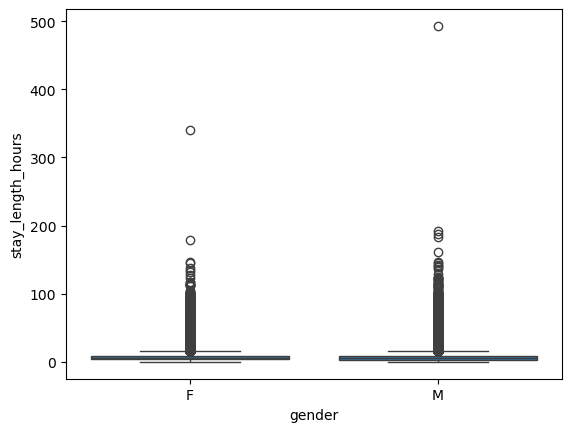

In [194]:
sns.boxplot(x='gender',y='stay_length_hours', data=df)
df.groupby('gender')['stay_length_hours'].describe()

,count,mean,std,min,25%,50%,75%,max
race,,,,,,,,
AMERICAN INDIAN/ALASKA NATIVE,1037.0,7.747003,7.813187,0.050000,3.666667,5.583333,8.616667,81.916667
ASIAN,7294.0,6.379065,6.247748,0.033333,3.066667,4.816667,7.333333,123.133333
ASIAN - ASIAN INDIAN,1567.0,6.487667,5.803518,0.000000,3.175000,5.000000,7.650000,58.950000
ASIAN - CHINESE,7348.0,6.813662,5.763102,0.016667,3.490069,5.366667,8.037222,75.583333
ASIAN - KOREAN,786.0,6.013887,5.268223,0.066667,2.954167,4.729306,7.320625,62.766667
ASIAN - SOUTH EAST ASIAN,1533.0,7.102041,5.846343,0.116667,3.683333,5.433333,8.333333,52.566667
BLACK/AFRICAN,4887.0,7.135815,6.810829,0.050000,3.371250,5.250000,8.216667,117.200000
BLACK/AFRICAN AMERICAN,76797.0,7.330288,7.109533,0.000000,3.516667,5.500000,8.527500,341.039722
BLACK/CAPE VERDEAN,7638.0,6.460856,5.266329,0.000000,3.416667,5.166667,7.683333,77.050000


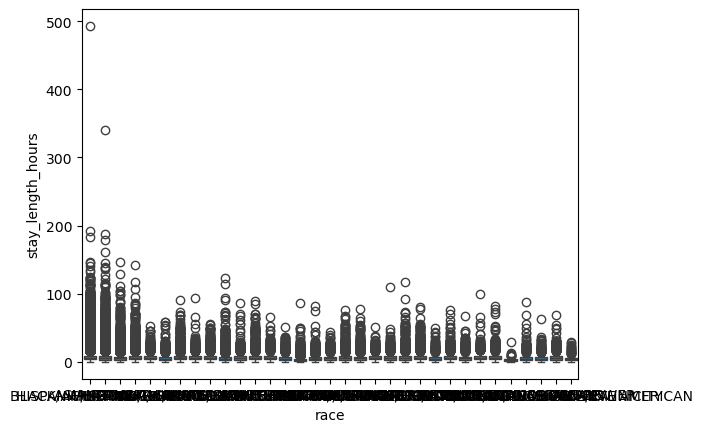

In [21]:
sns.boxplot(x='race',y='stay_length_hours', data=df)
df.groupby('race')['stay_length_hours'].describe()

,count,mean,std,min,25%,50%,75%,max
arrival_transport,,,,,,,,
AMBULANCE,155750.0,8.358838,7.350843,0.000000,4.266667,6.333333,9.625208,161.283333
HELICOPTER,868.0,4.787568,3.729299,0.200000,2.583333,3.875000,5.654167,29.700000
OTHER,1266.0,8.060958,9.848511,0.417222,3.312500,5.436528,8.600000,188.100000
UNKNOWN,15351.0,3.198278,4.131824,0.000000,1.283333,2.571667,4.183333,341.039722
WALK IN,251846.0,6.661419,6.084936,0.000000,3.333333,5.133333,7.750000,493.069444


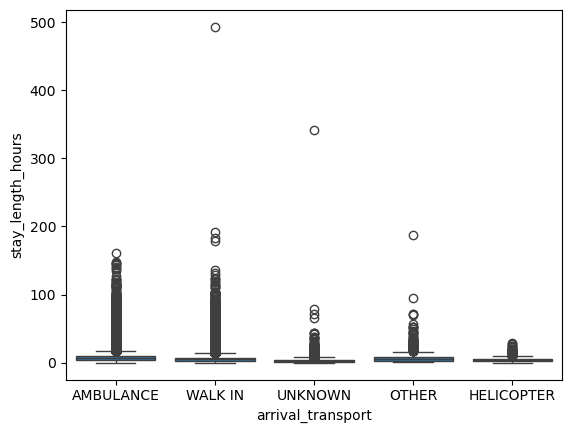

In [22]:
sns.boxplot(x='arrival_transport',y='stay_length_hours', data=df)
df.groupby('arrival_transport')['stay_length_hours'].describe()

,count,mean,std,min,25%,50%,75%,max
disposition,,,,,,,,
ADMITTED,158010.0,7.277163,5.009238,0.016667,4.333333,6.233333,8.783333,493.069444
ELOPED,5710.0,5.839039,5.444226,0.033333,2.600000,4.433333,7.266667,99.983333
EXPIRED,377.0,6.371842,4.151738,0.866667,4.200000,5.433333,7.450000,41.650000
HOME,241627.0,6.927128,6.747056,0.000000,3.233333,4.983333,7.783333,161.283333
LEFT AGAINST MEDICAL ADVICE,1881.0,6.836163,5.387121,0.071667,3.716667,5.500000,8.083333,52.283333
LEFT WITHOUT BEING SEEN,6154.0,2.268484,2.044617,0.016667,1.066667,1.933333,3.016667,54.683333
OTHER,4297.0,5.214621,5.930059,0.000000,0.766667,3.583333,7.291389,52.150000
TRANSFER,7025.0,19.129298,17.307125,0.033333,6.900000,15.400000,25.966667,192.566667


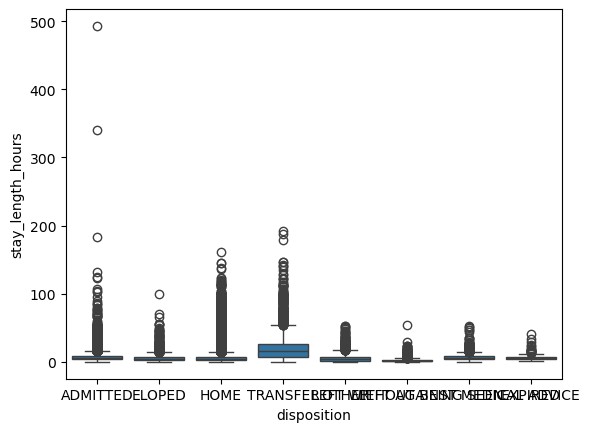

In [173]:
sns.boxplot(x='disposition',y='stay_length_hours', data=df)
df.groupby('disposition')['stay_length_hours'].describe()

,count,mean,std,min,25%,50%,75%,max
acuity,,,,,,,,
1.0,24019.0,6.091116,5.025050,0.0,3.333333,4.900000,7.166667,111.666667
2.0,139411.0,8.592253,8.050085,0.0,4.316667,6.366667,9.633333,493.069444
3.0,225063.0,6.952465,5.854776,0.0,3.600000,5.466667,8.183333,182.605556
4.0,28501.0,3.494022,3.528114,0.0,1.833333,2.716667,4.016667,113.016667
5.0,1100.0,2.466184,4.326955,0.0,0.950000,1.766667,2.787500,109.400000


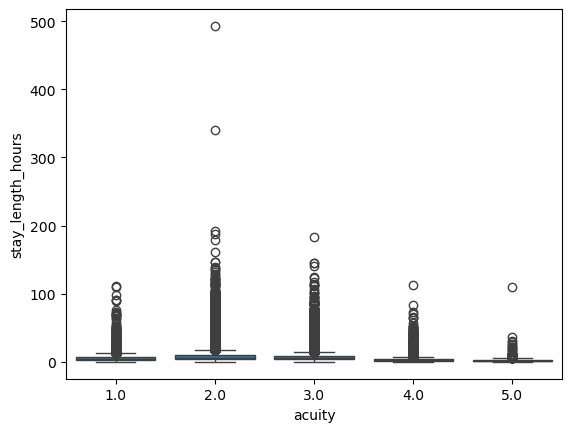

In [23]:
sns.boxplot(x='acuity',y='stay_length_hours', data=df)
df.groupby('acuity')['stay_length_hours'].describe()

<Axes: xlabel='temperature', ylabel='stay_length_hours'>

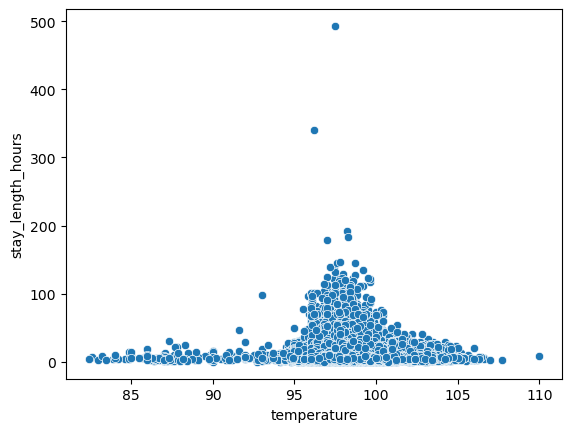

In [198]:
sns.scatterplot(x="temperature",
                    y="stay_length_hours",
                    data=df)

In [24]:
df.describe()

,subject_id_x,stay_id,temperature,heartrate,resprate,o2sat,sbp,dbp,acuity,day_of_week_intime,stay_length,stay_length_hours
count,4.250810e+05,4.250810e+05,401535.000000,407991.000000,404725.000000,404485.000000,406689.000000,405990.000000,418094.000000,425081.000000,425081,425081.000000
mean,1.500874e+07,3.499737e+07,98.084587,85.079933,17.552298,98.471875,135.409791,81.262125,2.625089,2.999720,0 days 07:09:31.073411890,7.158632
std,2.878475e+06,2.888330e+06,0.972557,18.041783,2.532889,17.040933,240.984057,1057.227843,0.708079,2.002362,0 days 06:37:38.875249779,6.627465
min,1.000003e+07,3.000001e+07,82.400000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0 days 00:00:00,0.000000
25%,1.251796e+07,3.249800e+07,97.500000,72.000000,16.000000,97.000000,120.000000,68.000000,2.000000,1.000000,0 days 03:32:00,3.533333
50%,1.501634e+07,3.499401e+07,98.000000,84.000000,18.000000,99.000000,133.000000,77.000000,3.000000,3.000000,0 days 05:28:00,5.466667
75%,1.749902e+07,3.750390e+07,98.600000,96.000000,18.000000,100.000000,148.000000,87.000000,3.000000,5.000000,0 days 08:19:00,8.316667
max,1.999999e+07,3.999996e+07,110.000000,1228.000000,209.000000,9322.000000,151103.000000,661672.000000,5.000000,6.000000,20 days 13:04:10,493.069444
